In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd

In [43]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [46]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [47]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [48]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [65]:
columns = pd.read_sql("select * from measurement", conn)
columns.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [50]:
max_date = pd.read_sql("select max(date) from measurement", conn)
max_date.head()

,max(date)
0,2017-08-23


In [106]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prep_data = pd.read_sql("select date, prcp as 'precipitation' from measurement where date between '2016-08-23' and '2017-08-23' and prcp not like 'NaN'", conn)
prep_data.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [107]:
prep_data_date = prep_data.set_index('date')
prep_data_date.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


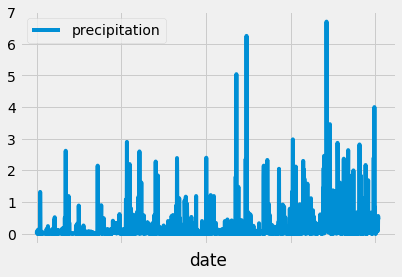

In [108]:
prep_data_date.plot()

In [109]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prep_data_date.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [110]:
# Design a query to show how many stations are available in this dataset?
station_data = pd.read_sql("select * from station",conn)
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [111]:
station_num_tot = pd.read_sql("select count(station) from station", conn)
station_num_tot

,count(station)
0,9


In [112]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_join = pd.read_sql("select a.station, count(a.station) as 'most active' from measurement a inner join station b on a.station=b.station group by a.station order by count(a.station) desc", conn)
station_join

,station,most active
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [113]:
station_join = station_join.set_index('station')
station_join

,most active
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [ ]:
station_prep_data = pd.read_sql("create table station_prep_data as select a.station, a.name, a.latitude, a.longitude, a.elevation, b.date, b.prcp, b.tobs from station a inner join measurement b on a.station=b.station", conn)

In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_data = pd.read_sql("select * from station_prep_data", conn)
temp_data.head()

,station,name,latitude,longitude,elevation,date,prcp,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [115]:
temp_data_min = pd.read_sql("select min(tobs) as 'lowest temp from station USC00519281' from station_prep_data where station = 'USC00519281'", conn)
temp_data_min

,lowest temp from station USC00519281
0,54.0


In [116]:
temp_data_max = pd.read_sql("select max(tobs) as 'highest temp from station USC00519281' from station_prep_data where station = 'USC00519281'", conn)
temp_data_max

,highest temp from station USC00519281
0,85.0


In [117]:
temp_data_avg = pd.read_sql("select round(avg(tobs),1) as 'avg temp from station USC00519281' from station_prep_data where station = 'USC00519281'", conn)
temp_data_avg

,avg temp from station USC00519281
0,71.7


In [120]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_max = pd.read_sql("select tobs as 'temp observations' from station_prep_data where date between '2016-08-23' and '2017-08-23'", conn)
tobs_max.head()

,temp observations
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B6E30588>]],
      dtype=object)

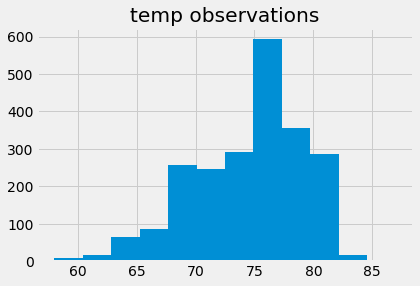

In [122]:
tobs_max.hist(bins=12)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
